# Quantum-deutsch

This notebook contains a clear and consise comparison of [quantum computing](https://en.wikipedia.org/wiki/Quantum_computing#:~:text=Quantum%20computing%20is%20a%20type,and%20entanglement%2C%20to%20perform%20calculations.&text=The%20study%20of%20quantum%20computing%20is%20a%20subfield%20of%20quantum%20information%20science.) and classical computing

An explanation of [Deutsch’s algorithm](https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html) and code simulating it using [qiskit](https://qiskit.org/)

***

### Quantum Computing

Quantum computing is a sort of computer that uses the collective features of quantum states to execute calculations, such as superposition, interference, and entanglement. Quantum computing makes use of quantum bits, also known as qubits. Qubit can have the value of both 1 and 0 at the same time. Physical systems like as the spin of an electron or the direction of a photon are used to create qubits. These supercomputers are based on the quantum physics concepts of superposition and entanglement. Quantum entanglement allows qubits to be inextricably connected. Quantum algorithms may be more efficient than their classical counterparts in solving certain computer problems.These supercomputers are based on the quantum physics concepts of superposition and entanglement. 

<center><img width="500" src="https://miro.medium.com/max/1400/1*jA5nMVXf6jyPB2jYIk_PTQ.png" /></center>

Quantum Computing has the potential to make a significant contribution to the fields of machine learching, artificial intelligence and more. some of the most well-known technological companies involved in Quantum Computing such as Microsoft, Intel, IBM, Google and much more. 

### How does Quantum Computing work?

Quantum computers calculate the probability of an object's condition before it is measured. Operations in quantum computing employ an object's quantum state to generate a qubit. Qubits may have many states at once and hold far more data than a single bit. These are the features of an object that are unspecified before they are identified. Quantum computers are based on two fundamental concepts in quantum physics, Superposition and Entanglement. Superposition refers to the ability to exist in numerous states at once. A quantum computer with many qubits in superposition can process a large number of different possible outputs at the same time.
Quantum entanglement is a sort of superposition that occurs when two or more qubits are in the same state. When two or more qubits are entangled, a change to one of them can have an effect on the others.

### Comparison of Quantum Computing and Classical Computing

Quantum computers uses quantum bits, also known as qubits, to manipulate ones and zeros through operations. Quantum computers employ ones and zeros in the same way as classical computers do, but qubits include a third state called "superposition" that enables them to represent a one or a zero at the same time.
Classical computers are ideal for doing normal tasks that require the use of a computer. Quantum computers, on the other hand, are ideal for simulations and data analysis.

| Quantum Computing | | Classical Computing   |
|------|------|------|
| Used by multi-purpose computers and gadgets on a big scale  | | High-speed quantum mechanics-based computers use it |
| There are just two states that are possible: 0 and 1  | | There are an endless amount of states that might exist |
| Boolean Algebra is used to define operations  | | Linear algebra in Hilbert space is used to define operations |
| Ideal for activities such as optimization, data analysis, and simulations  | | Classic computers are best suited for most everyday tasks |
| Mathematical algorithms are used to encrypt data  | | Quantum characteristics are used to encrypt data |

# Deutsch's Algorithm

https://www.qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html

***

In [1]:
# Qiskit 
import qiskit

In [2]:
# Aer simulator
import qiskit.providers.aer as aer

In [3]:
# Diagrams
import matplotlib.pyplot as plt

In [4]:
# Change pyplot style
plt.style.use('ggplot')

<br>

### Hadamard Gate

***

$ H = \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$

$ H | 0 \rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} =  \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} = |+\rangle $

$ H | 1 \rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix} =  \begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{bmatrix} = |-\rangle $

###### Identity 
$ I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} $

<br>

## Constant Zero Function

***

In [5]:
# Create a quantum circuit
circuit = qiskit.QuantumCircuit(2, 1)

In [6]:
# Initialise the first qubit to 0 
circuit.initialize([1,0], 0)

In [7]:
# Initialise the second qubit to 1
circuit.initialize([0,1], 1)

In [8]:
# Apply a Hadamard gate to first qubit
circuit.h(0)

In [9]:
# Apply a Hadamard gate to second qubit
circuit.h(1)

In [10]:
# Identity gate
circuit.i(1)

In [11]:
# Apply another Hadamard gate to the first qubit
circuit.h(0)

In [12]:
# Measure the first qubit
circuit.measure(0,0)

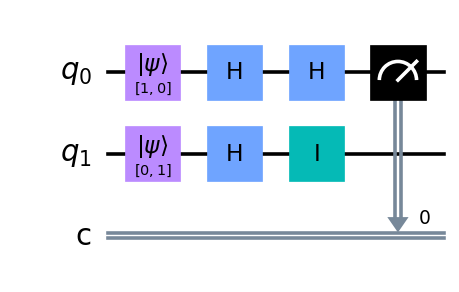

In [13]:
# Draw the circuit
circuit.draw(output='mpl', scale=1.8)

In [14]:
# Create a simulation instance
simulator = aer.QasmSimulator()

In [15]:
# Compile the circuit in the simulator
compcircuit = qiskit.transpile(circuit, simulator)

In [16]:
# Simulate the circuit 1000 times
job = simulator.run(compcircuit, shots=1000)

In [17]:
# Get the results
results = job.result()

In [18]:
# Show the result
counts = results.get_counts()
counts

{'0': 1000}

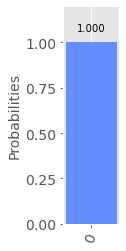

In [19]:
# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

<br>

## Constant one Function

***

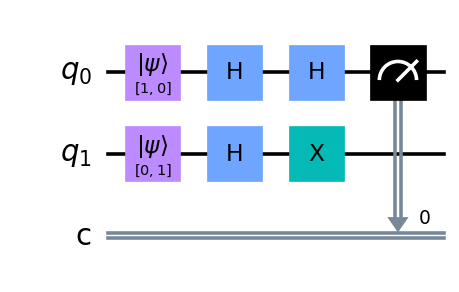

In [20]:
# Create a quantum circuit
circuit = qiskit.QuantumCircuit(2, 1)

# Initialise the first qubit to 0 
circuit.initialize([1,0], 0)

# Initialise the second qubit to 1
circuit.initialize([0,1], 1)

# Apply a Hadamard gate to each qubit
circuit.h((0, 1))

# X gate
circuit.x(1)

# Apply another Hadamard gate to the first qubit
circuit.h(0)

# Measure the first qubit
circuit.measure(0,0)

# Draw the circuit
circuit.draw(output='mpl', scale=1.8)

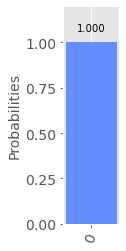

In [21]:
# Create a simulation instance
simulator = aer.QasmSimulator()

# Compile the circuit in the simulator
compcircuit = qiskit.transpile(circuit, simulator)

# Simulate the circuit 1000 times
job = simulator.run(compcircuit, shots=1000)

# Get the results
results = job.result()

# Show the result
counts = results.get_counts()

# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

<br> 

## Balanced: $f(0) = 0, f(1) = 1$

***

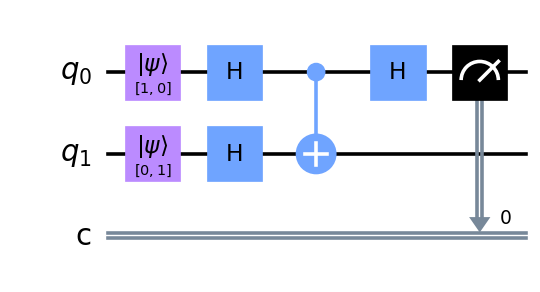

In [22]:
# Create a quantum circuit
circuit = qiskit.QuantumCircuit(2, 1)

# Initialise the first qubit to 0 
circuit.initialize([1,0], 0)

# Initialise the second qubit to 1
circuit.initialize([0,1], 1)

# Apply a Hadamard gate to each qubit
circuit.h((0, 1))

# CNOT gate
circuit.cnot(0, 1)

# Apply another Hadamard gate to the first qubit
circuit.h(0)

# Measure the first qubit
circuit.measure(0,0)

# Draw the circuit
circuit.draw(output='mpl', scale=1.8)

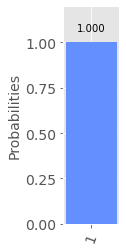

In [23]:
# Create a simulation instance
simulator = aer.QasmSimulator()

# Compile the circuit in the simulator
compcircuit = qiskit.transpile(circuit, simulator)

# Simulate the circuit 1000 times
job = simulator.run(compcircuit, shots=1000)

# Get the results
results = job.result()

# Show the result
counts = results.get_counts()

# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

<br> 

## Balanced: $f(0) = 1, f(1) = 0$

***

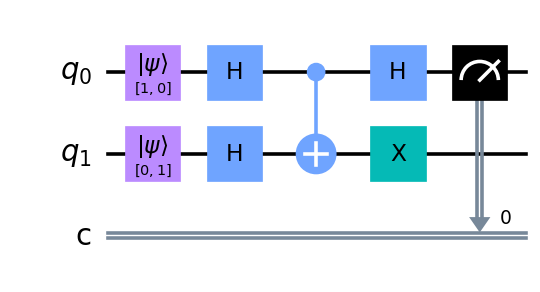

In [24]:
# Create a quantum circuit
circuit = qiskit.QuantumCircuit(2, 1)

# Initialise the first qubit to 0 
circuit.initialize([1,0], 0)

# Initialise the second qubit to 1
circuit.initialize([0,1], 1)

# Apply a Hadamard gate to each qubit
circuit.h((0, 1))

# CNOT gate
circuit.cnot(0, 1)

# Apply x to second qubit
circuit.x(1)

# Apply another Hadamard gate to the first qubit
circuit.h(0)

# Measure the first qubit
circuit.measure(0,0)

# Draw the circuit
circuit.draw(output='mpl', scale=1.8)

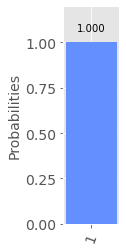

In [25]:
# Create a simulation instance
simulator = aer.QasmSimulator()

# Compile the circuit in the simulator
compcircuit = qiskit.transpile(circuit, simulator)

# Simulate the circuit 1000 times
job = simulator.run(compcircuit, shots=1000)

# Get the results
results = job.result()

# Show the result
counts = results.get_counts()

# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

### End 

***